In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive

/content/drive


In [ ]:
cd MyDrive

/content/drive/MyDrive


In [ ]:
import pandas as pd

df = pd.read_csv('Flight Summary - North Atlantic - 2019.csv')
filtered_data = df[df["Persistent contrail length (km)"] > 0]

In [ ]:
filtered_data.head()

,ICAO Aircraft type designator,First known waypoint time (UTC),Last known waypoint time (UTC),Direction,Total flight dist (km),Total fuel burn (kg),Mean overall propulsion efficiency,Aircraft mass mean (kg),Mean nvPM number EI (kg-1),Initial contrail length (km),...,"Ice vol mean radius, Mean (um)","Tau contrail, Mean","Tau cirrus, Mean",RF SW (W m-2),RF LW (W m-2),RF Net (W m-2),Total contrail EF (J),SDR mean (W m-2),RSR mean (W m-2),OLR mean (W m-2)
1,B763,2019-01-01 02:19:06,2019-01-01 05:27:55,E,2670.997754,13886.660380,0.325782,150812.984413,1.425808e+15,1701.125144,...,3.716948,0.090483,0.001725,-0.565425,4.231059,3.665634,1.515245e+14,36.862724,15.583469,238.200396
6,B77W,2019-01-01 02:52:15,2019-01-01 05:40:58,W,2454.206073,22961.400338,0.349929,284846.653436,5.387187e+14,2301.760372,...,14.000310,0.170856,0.167571,0.000000,8.847818,8.847818,9.437860e+14,0.034721,0.055088,208.938358
10,B772,2019-01-01 00:16:39,2019-01-01 03:07:07,E,2565.932833,19625.791058,0.336568,231552.546423,5.180514e+14,1769.517466,...,9.268893,0.079008,0.045336,0.000000,4.523805,4.523805,8.174670e+14,0.000000,0.000000,216.175025
21,B789,2019-01-01 00:37:15,2019-01-01 03:13:24,E,2373.790808,13802.532168,0.366840,210022.578846,1.302981e+15,1928.436442,...,2.969259,0.049081,0.042563,0.000000,1.678470,1.678470,2.105545e+14,0.000000,0.000000,195.035091
26,B77W,2019-01-01 02:35:19,2019-01-01 05:20:28,E,2510.123492,23168.670110,0.344524,284705.962602,5.273441e+14,1766.966954,...,13.593999,0.182512,0.186217,-0.003279,9.024577,9.021298,1.350368e+15,0.645140,0.419577,200.392768


In [ ]:
filtered_data.columns

Index(['ICAO Aircraft type designator', 'First known waypoint time (UTC)',
       'Last known waypoint time (UTC)', 'Direction', 'Total flight dist (km)',
       'Total fuel burn (kg)', 'Mean overall propulsion efficiency',
       'Aircraft mass mean (kg)', 'Mean nvPM number EI (kg-1)',
       'Initial contrail length (km)', 'First contrail waypoint time (UTC)',
       'Last contrail waypoint time (UTC)', 'RHi initial, Mean',
       'RHi initial, Stdev', 'RHi lifetime, Mean', 'Temp initial, Mean (K)',
       'Temp initial, Stdev (K)', 'Temp SAC, Mean (K)', 'Temp SAC, Stdev (K)',
       'Persistent contrail length (km)',
       'Contrail altitude initial, Mean (ft)',
       'Contrail altitude lifetime, Mean (ft)', 'Contrail age, Mean (h)',
       'Contrail age, Max (h)', 'Ice number initial, Mean (m-1)',
       'Ice number initial, Stdev (m-1)', 'Ice number lifetime, Mean (m-1)',
       'Ice vol mean radius, Mean (um)', 'Tau contrail, Mean',
       'Tau cirrus, Mean', 'RF SW (W m-2)', '

In [ ]:
# Calculate the average values for the specified parameters
average_contrail_length = filtered_data['Persistent contrail length (km)'].mean()
average_contrail_duration = (filtered_data['Contrail age, Mean (h)'] + filtered_data['Contrail age, Max (h)']) / 2

# Variability could mean standard deviation here
variability_contrail_length = filtered_data['Persistent contrail length (km)'].std()
variability_contrail_duration = filtered_data['Contrail age, Mean (h)'].std()

# Temperature range of persistent contrails (assuming Temp initial, Mean (K) is the relevant temperature)
temp_range_persistent_contrails = (
    filtered_data['Temp initial, Mean (K)'].max() - filtered_data['Temp initial, Mean (K)'].min()
)

# Ice range of persistent contrails (assuming Ice number initial, Mean (m-1) is the relevant variable)
ice_range_persistent_contrails = (
    filtered_data['Ice number initial, Mean (m-1)'].max() -
    filtered_data['Ice number initial, Mean (m-1)'].min()
)

# Average flight distance and fuel burn
average_flight_distance = filtered_data['Total flight dist (km)'].mean()
average_fuel_burn = filtered_data['Total fuel burn (kg)'].mean()

# Average aircraft mass
average_aircraft_mass = filtered_data['Aircraft mass mean (kg)'].mean()

# Average nvPM number
average_nvPM_number = filtered_data['Mean nvPM number EI (kg-1)'].mean()

# Print the results
print(f"Average Contrail Length (km): {average_contrail_length}")
print(f"Average Contrail Duration (h): {average_contrail_duration}")
print(f"Variability in Contrail Length (km): {variability_contrail_length}")
print(f"Variability in Contrail Duration (h): {variability_contrail_duration}")
print(f"Temperature Range of Persistent Contrails (K): {temp_range_persistent_contrails}")
print(f"Ice Range of Persistent Contrails (number/m^3): {ice_range_persistent_contrails}")
print(f"Average Flight Distance (km): {average_flight_distance}")
print(f"Average Fuel Burn (kg): {average_fuel_burn}")
print(f"Average Aircraft Mass (kg): {average_aircraft_mass}")
print(f"Average nvPM Number (kg^-1): {average_nvPM_number}")


Average Contrail Length (km): 718.3564433905293
Average Contrail Duration (h): 1          6.815976
6          6.027740
10         6.030343
21         4.455447
26         8.089133
            ...    
477918    11.056092
477919     8.163025
477920     8.362401
477921     5.598716
477922     6.649444
Length: 267076, dtype: float64
Variability in Contrail Length (km): 501.36627446656337
Variability in Contrail Duration (h): 2.0122300441134264
Temperature Range of Persistent Contrails (K): 37.5016312973996
Ice Range of Persistent Contrails (number/m^3): 21153890275348.438
Average Flight Distance (km): 2537.5715776462353
Average Fuel Burn (kg): 19873.60851242563
Average Aircraft Mass (kg): 216510.76264221524
Average nvPM Number (kg^-1): 984481434975571.9


<ipython-input-6-7ea9d87680c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filtered_data.corr()


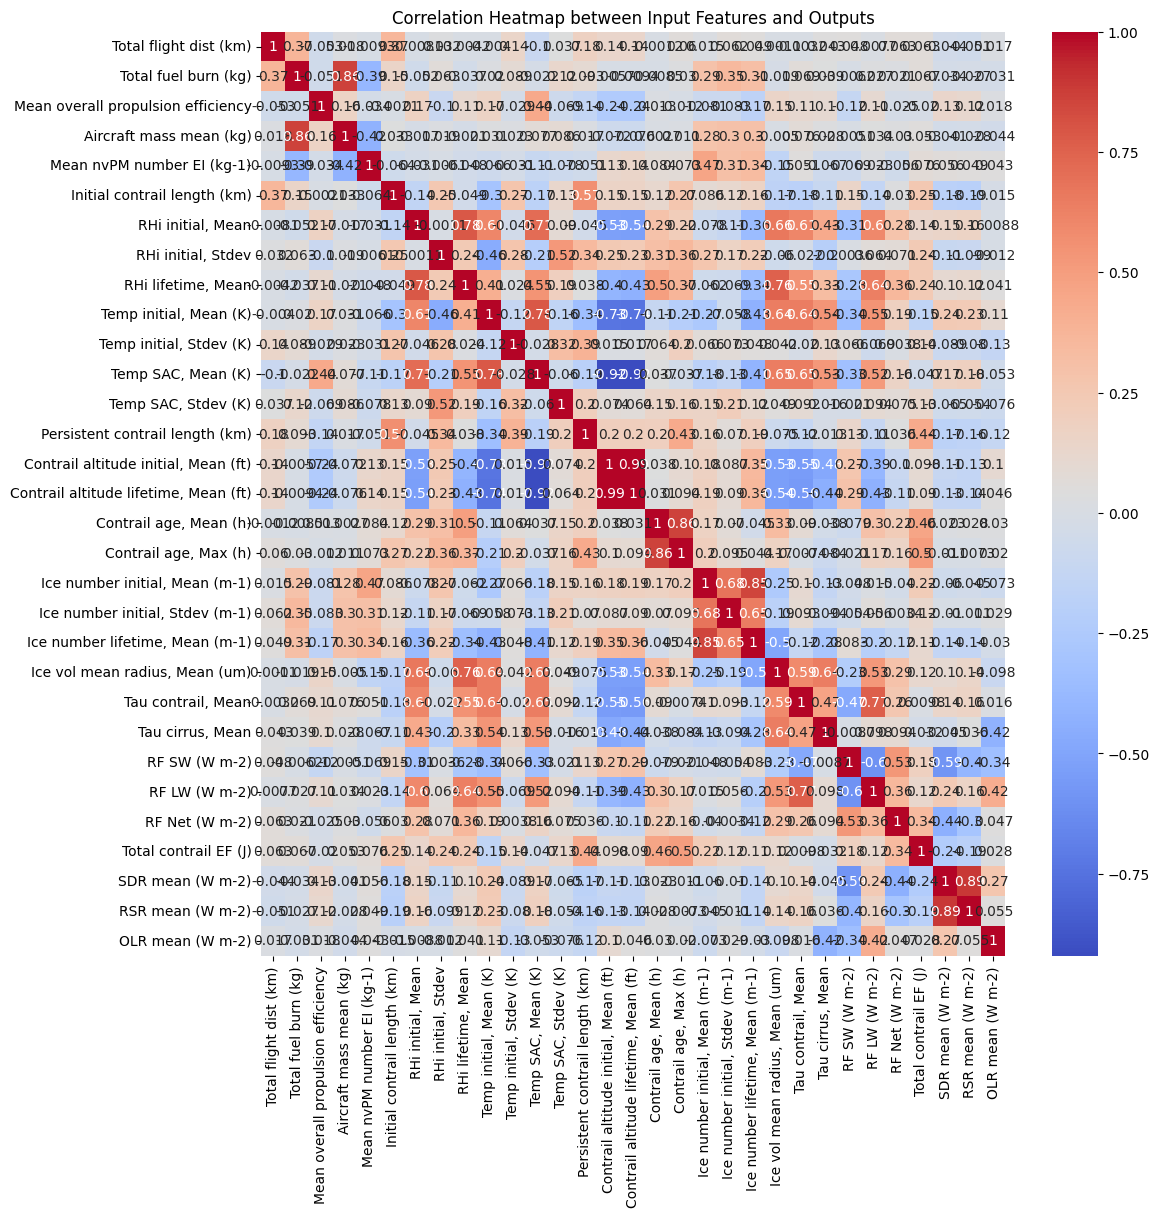

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = filtered_data.corr()

# Creating the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Input Features and Outputs')
plt.show()

In [ ]:
features = filtered_data.drop(axis=1, columns = ['Initial contrail length (km)', 'Contrail altitude initial, Mean (ft)', 'Contrail altitude lifetime, Mean (ft)', 'Contrail age, Mean (h)',
                                      'Contrail age, Max (h)', 'Ice number lifetime, Mean (m-1)', 'Total contrail EF (J)'])

In [ ]:
features.corr()['Persistent contrail length (km)'].drop('Persistent contrail length (km)').sort_values(ascending=False)


<ipython-input-8-baec31a275b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corr()['Persistent contrail length (km)'].drop('Persistent contrail length (km)').sort_values(ascending=False)


Temp initial, Stdev (K)               0.387849
RHi initial, Stdev                    0.341497
Temp SAC, Stdev (K)                   0.202229
Total flight dist (km)                0.178637
Ice number initial, Mean (m-1)        0.164118
RF SW (W m-2)                         0.134364
Total fuel burn (kg)                  0.092606
Ice number initial, Stdev (m-1)       0.069600
RHi lifetime, Mean                    0.038455
RF Net (W m-2)                        0.035960
Aircraft mass mean (kg)               0.017336
Tau cirrus, Mean                     -0.012868
RHi initial, Mean                    -0.045236
Mean nvPM number EI (kg-1)           -0.051372
Ice vol mean radius, Mean (um)       -0.075477
RF LW (W m-2)                        -0.113747
Tau contrail, Mean                   -0.120590
OLR mean (W m-2)                     -0.121226
Mean overall propulsion efficiency   -0.135505
RSR mean (W m-2)                     -0.158454
SDR mean (W m-2)                     -0.172185
Temp SAC, Mea

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

numerical_features = features.select_dtypes(exclude=['object'])

target = filtered_data['Persistent contrail length (km)']

X_train, X_test, y_train, y_test = train_test_split(numerical_features, target, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = numerical_features.columns

# Creating a DataFrame for easier visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Displaying the feature importances
print(importance_df)


                               Feature    Importance
12     Persistent contrail length (km)  9.999988e-01
0               Total flight dist (km)  5.598425e-07
15      Ice vol mean radius, Mean (um)  1.351156e-07
8               Temp initial, Mean (K)  1.023914e-07
18                       RF SW (W m-2)  7.687789e-08
13      Ice number initial, Mean (m-1)  7.157254e-08
16                  Tau contrail, Mean  4.726736e-08
17                    Tau cirrus, Mean  4.352168e-08
10                  Temp SAC, Mean (K)  3.499494e-08
4           Mean nvPM number EI (kg-1)  2.691954e-08
14     Ice number initial, Stdev (m-1)  2.599098e-08
22                    RSR mean (W m-2)  2.557547e-08
1                 Total fuel burn (kg)  2.102100e-08
21                    SDR mean (W m-2)  1.189392e-08
2   Mean overall propulsion efficiency  8.805675e-09
3              Aircraft mass mean (kg)  8.600173e-09
11                 Temp SAC, Stdev (K)  8.374125e-09
6                   RHi initial, Stdev  7.1639

In [ ]:
features_excluding_target = numerical_features.drop(columns=['Persistent contrail length (km)'])

X_train, X_test, y_train, y_test = train_test_split(features_excluding_target, target, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = features_excluding_target.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
9,"Temp initial, Stdev (K)",0.285189
8,"Temp initial, Mean (K)",0.076473
4,Mean nvPM number EI (kg-1),0.068272
11,"Temp SAC, Stdev (K)",0.061003
0,Total flight dist (km),0.051660
14,"Ice vol mean radius, Mean (um)",0.038711
12,"Ice number initial, Mean (m-1)",0.038292
16,"Tau cirrus, Mean",0.037094
22,OLR mean (W m-2),0.036450
2,Mean overall propulsion efficiency,0.030191


In [ ]:
input_features = importance_df.head(10)['Feature'].values

In [ ]:
input_features = importance_df.head(10)['Feature'].values

model_data = filtered_data[input_features.tolist() + ['Persistent contrail length (km)']]

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

target = 'Persistent contrail length (km)'
X = model_data.drop(target, axis=1)
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "XGBoost Gamma": XGBRegressor(objective='reg:gamma', random_state=42)
}

results = {}

for name, model in models.items():

    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)

    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    results[name] = {'Test RMSE': test_rmse, 'Test MAPE': test_mape, 'Test R²': test_r2}

for model in results:
    print(f"{model}: Test RMSE = {results[model]['Test RMSE']}, Test MAPE = {results[model]['Test MAPE']}%, Test R² = {results[model]['Test R²']}")


Linear Regression: Test RMSE = 424.49771281728795, Test MAPE = 91.80023629923546%, Test R² = 0.28155214008394025
Random Forest: Test RMSE = 323.7061632535353, Test MAPE = 54.330221834874095%, Test R² = 0.5822211185253002
GradientBoostingRegressor: Test RMSE = 360.7834406163876, Test MAPE = 61.90059294642101%, Test R² = 0.48103539570967757
XGBoost: Test RMSE = 323.45894681241157, Test MAPE = 52.49732497922173%, Test R² = 0.5828589955971024
XGBoost Gamma: Test RMSE = 325.0404450138725, Test MAPE = 49.61766933095651%, Test R² = 0.578769941824681


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data
target = 'Persistent contrail length (km)'
X = model_data.drop(target, axis=1)
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters to tune for each model
param_grid = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "GradientBoostingRegressor": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
}

# Results dictionary
results = {}

# Tuning and evaluating each model
for name, model in param_grid.items():
    print(f"Processing {name}...")
    grid_search = GridSearchCV(estimator=models[name], param_grid=model, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    test_predictions = best_model.predict(X_test_scaled)

    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_r2 = r2_score(y_test, test_predictions)

    results[name] = {'Test RMSE': test_rmse, 'Test R²': test_r2, 'Best Params': grid_search.best_params_}

# Display results
for model in results:
    print(f"{model}: Test RMSE = {results[model]['Test RMSE']}, Test R² = {results[model]['Test R²']}, Best Params = {results[model]['Best Params']}")


Processing Random Forest...
Processing GradientBoostingRegressor...
Processing XGBoost...
Random Forest: Test RMSE = 326.6160805339578, Test R² = 0.574676213126646, Best Params = {'max_depth': 20, 'n_estimators': 200}
GradientBoostingRegressor: Test RMSE = 351.12836674026937, Test R² = 0.5084401771816697, Best Params = {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost: Test RMSE = 332.3898769418172, Test R² = 0.5595058717814845, Best Params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [ ]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

target = 'Persistent contrail length (km)'
X = model_data.drop(target, axis=1)
y = model_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10)

loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)

Epoch 1/100
14957/14957 [==============================] - 50s 3ms/step - loss: 184740.0625 - val_loss: 161981.3906
Epoch 2/100
14957/14957 [==============================] - 45s 3ms/step - loss: 153694.1875 - val_loss: 151077.7812
Epoch 3/100
14957/14957 [==============================] - 45s 3ms/step - loss: 146982.6562 - val_loss: 148055.6094
Epoch 4/100
14957/14957 [==============================] - 45s 3ms/step - loss: 141617.6094 - val_loss: 140145.7188
Epoch 5/100
14957/14957 [==============================] - 45s 3ms/step - loss: 136207.6719 - val_loss: 136640.3438
Epoch 6/100
14957/14957 [==============================] - 44s 3ms/step - loss: 133804.3125 - val_loss: 134720.7188
Epoch 7/100
14957/14957 [==============================] - 44s 3ms/step - loss: 132191.5938 - val_loss: 134243.5312
Epoch 8/100
14957/14957 [==============================] - 44s 3ms/step - loss: 130629.0312 - val_loss: 131744.9844
Epoch 9/100
14957/14957 [==============================] - 44s 3ms/step 

In [ ]:
model_data

,"Temp initial, Stdev (K)","Temp initial, Mean (K)",Mean nvPM number EI (kg-1),"Temp SAC, Stdev (K)",Total flight dist (km),"Ice vol mean radius, Mean (um)","Ice number initial, Mean (m-1)","Tau cirrus, Mean",OLR mean (W m-2),Mean overall propulsion efficiency,Persistent contrail length (km)
1,0.195622,213.532187,1.425808e+15,0.689557,2670.997754,3.716948,3.968575e+12,0.001725,238.200396,0.325782,536.746493
6,0.123778,219.280309,5.387187e+14,0.510421,2454.206073,14.000310,2.635152e+12,0.167571,208.938358,0.349929,769.466861
10,0.357759,213.109171,5.180514e+14,0.411562,2565.932833,9.268893,2.279124e+12,0.045336,216.175025,0.336568,1138.698193
21,0.454122,209.719876,1.302981e+15,0.687361,2373.790808,2.969259,5.974121e+12,0.042563,195.035091,0.366840,1244.628185
26,0.165068,216.649989,5.273441e+14,0.786973,2510.123492,13.593999,3.175801e+12,0.186217,200.392768,0.344524,1209.709142
...,...,...,...,...,...,...,...,...,...,...,...
477918,0.163783,210.201732,1.135276e+15,0.453072,2087.017297,7.428535,4.719248e+12,0.090032,219.566534,0.321702,1125.965753
477919,1.240604,210.874679,2.394486e+14,0.607586,2606.391287,10.035975,1.755778e+12,0.177454,166.905632,0.352150,940.083535
477920,2.925644,207.150386,1.204005e+15,0.657275,2548.921249,4.552373,4.743076e+12,0.050680,157.205241,0.314231,793.452416
477921,1.565069,216.861311,5.132590e+14,1.010995,2459.847311,8.937103,3.611247e+12,0.155855,195.630176,0.335076,1086.641065


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer

# Hidden layers
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))  # Dropout layer

# Output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicting on the test set
nn_predictions = model.predict(X_test_scaled)

# Calculating RMSE for the neural network
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

# Calculating R² score for the neural network
nn_r2 = r2_score(y_test, nn_predictions)

# Print out the metrics for comparison
print(f"Neural Network - Test RMSE: {nn_rmse}, Test R²: {nn_r2}")


2504/2504 [==============================] - 4s 1ms/step
Neural Network - Test RMSE: 348.89592809067256, Test R²: 0.5146708822126349


In [ ]:
# Assuming 'results' is the dictionary with your LinReg and XGBoost results
results['Neural Network'] = {'Test RMSE': nn_rmse, 'Test R²': nn_r2}

# Display results for all models
for model in results:
    print(f"{model}: Test RMSE = {results[model]['Test RMSE']}, Test R² = {results[model]['Test R²']}")
